We will work with matplotlib. I will section off the python section so we can focus only on the graphing part

In [3]:
import pandas as pd
from datasets import load_dataset
import ast

import matplotlib.pyplot as plt

#loading data
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

#data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.describe()
df.info()
df.iloc[0:2]

#filter to US jobs
df_US = df[(df.job_country == 'United States')]

#transition the str skills to list 
df_US['job_skills'] = df_US['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

C:\Users\david\AppData\Local\Temp\ipykernel_18268\2656739678.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US['job_skills'] = df_US['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)


### Intro portion

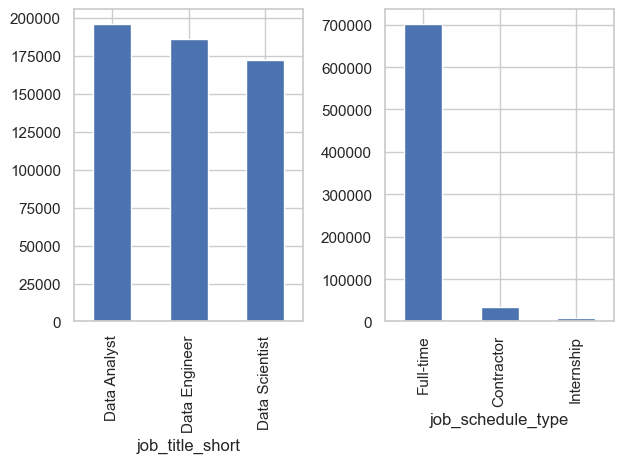

In [4]:
#rows and column, it will highlight
#fig is the entire plot, ax is the specific layout
fig, ax = plt.subplots(1,2)

#within the .plot() function is a parameter called ax that lets you choose the position of the graph
df['job_title_short'].value_counts().head(3).plot(kind='bar', ax = ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

#running fig can change the overall theme and fix the problem with overlapping charts
fig.tight_layout()

### end of intro portion

Using subplots() to plot differnce data jobs and their skills

In [5]:
#crating the df that we will use to plot
#this is a panda portion

df_skills = df_US.explode('job_skills').copy()

skill_count = df_skills.groupby(by =['job_skills', 'job_title_short']).size()

#When you reset the index of a grouped object (like the result of groupby()), it converts the group keys 
# (which were previously used as the index) into regular columns.
df_skills_count = skill_count.reset_index(name = 'skill_count')
#type(df_skills_count)
#type(skill_count)

df_skills_count.sort_values(by= 'skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


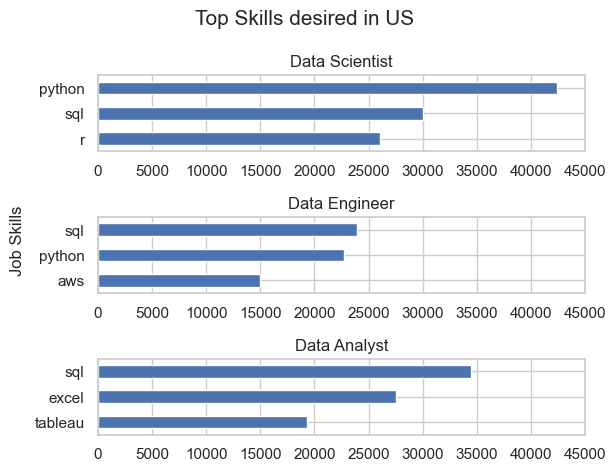

In [6]:
#matplotlib portion 

fig, ax= plt.subplots(3,1)

#graphing if all the graphs are the same formating and of the same data
#the 3 job title that we want
job_title = ['Data Scientist', 'Data Engineer', 'Data Analyst']

for i, job_title in enumerate(job_title):
    #data frame for each job_title that we want and the top 3 jobs.
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(3)
    # notice that we have a new parameter title, very useful to give each plot its own title
    df_plot.plot(kind='barh', x='job_skills', y = 'skill_count', ax=ax[i], title = job_title)

    #clean up ax

    #alternative to setting title while ploting
    #ax[i].set_title(f"Top skills for {job_title}")
    #invert y if you have to. this is easier than no subplots as we do not need the gca method
    ax[i].invert_yaxis()
    #ensure that all the ax has the same measurement and ticks
    ax[i].set_xlim(0, 45000)
    #no repeating y axis, but a fig, y axis
    ax[i].set_ylabel('')
    #remove legends
    ax[i].legend().set_visible(False)

#clean up fig
fig.suptitle('Top Skills desired in US', fontsize= 15)
# Add a universal y-axis label
fig.text(0.04, 0.5, 'Job Skills', va='center', rotation='vertical', fontsize=12)
# Adjust layout to prevent overlap and leave space for the suptitle
fig.tight_layout(rect=[0.05, 0, 1, 1])  # Increase the left rect margin, left, bottom, right, top where 0,0,1,1 is the whole space and it changes from there

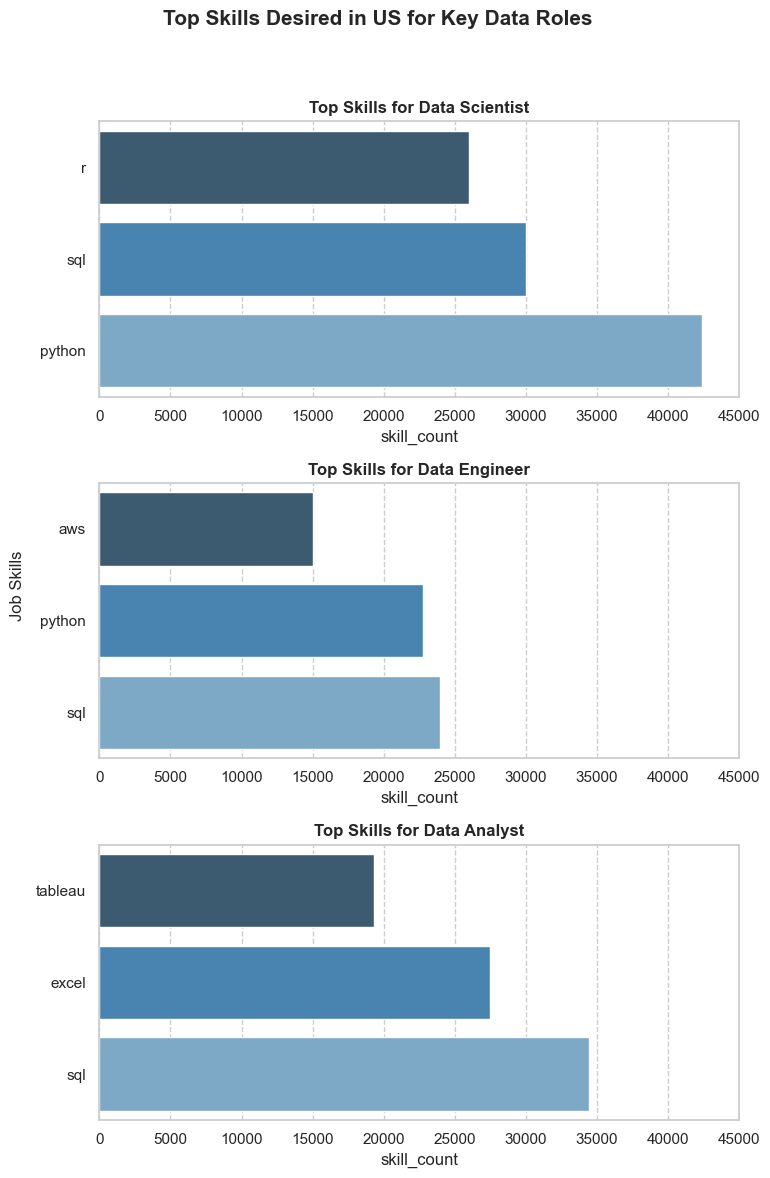

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes for subplots
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

# Set the seaborn theme for cleaner visuals
sns.set_theme(style="whitegrid")

# List of job titles for which the top skills will be plotted
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

# Loop over each job title and generate a plot for the top 3 skills
for i, job_title in enumerate(job_titles):
    # Filter data for the current job title and get the top 3 skills
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(3)
    
    # Create a horizontal barplot using Seaborn, assigning hue to the y-axis (job_skills)
    sns.barplot(
        x='skill_count', 
        y='job_skills', 
        data=df_plot, 
        ax=ax[i], 
        hue='job_skills',  # Assign hue to y variable
        palette='Blues_d',  # Darker blue palette
        legend=False  # Disable legend
    )
    
    # Set the title for each subplot
    ax[i].set_title(f"Top Skills for {job_title}", fontsize=12, fontweight='bold')
    
    # Invert y-axis so the highest skill appears on top
    ax[i].invert_yaxis()
    
    # Set consistent x-axis limits for all subplots
    ax[i].set_xlim(0, 45000)
    
    # Remove y-axis labels (to avoid clutter)
    ax[i].set_ylabel('')
    
    # Hide the grid to make it cleaner
    ax[i].grid(True, which='both', axis='x', linestyle='--')

# Add a universal title for the figure
fig.suptitle('Top Skills Desired in US for Key Data Roles', fontsize=15, fontweight='bold')

# Add a common y-axis label
fig.text(0.04, 0.5, 'Job Skills', va='center', rotation='vertical', fontsize=12)

# Adjust layout to prevent overlap and give space for titles
fig.tight_layout(rect=[0.05, 0, 1, 0.95])

# Show the plot
plt.show()


In [8]:
help(plt.tight_layout)

Help on function tight_layout in module matplotlib.pyplot:

tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'
    Adjust the padding between and around subplots.
    
    To exclude an artist on the Axes from the bounding box calculation
    that determines the subplot parameters (i.e. legend, or annotation),
    set ``a.set_in_layout(False)`` for that artist.
    
    Parameters
    ----------
    pad : float, default: 1.08
        Padding between the figure edge and the edges of subplots,
        as a fraction of the font size.
    h_pad, w_pad : float, default: *pad*
        Padding (height/width) between edges of adjacent subplots,
        as a fraction of the font size.
    rect : tuple (left, bottom, right, top), default: (0, 0, 1, 1)
        A rectangle in normalized figure coordinates into which the whole
        subplots area (including labels) will fit.
    
    S